In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [2]:
toyota = pd.read_excel('ToyotaCorolla.xlsx')

In [3]:
toyota.columns


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
toyota.drop(['Id', 'Model','Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis=1,inplace=True)

In [5]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [6]:
toyota.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT'},inplace=True)

In [7]:
toyota.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [8]:
toyota[toyota.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
toyo =toyota.drop_duplicates().reset_index()


In [10]:
toyo.drop(["index"],axis=1,inplace=True)

In [11]:
toyo.shape

(1435, 9)

### Correlation Matrix

In [12]:
toyo.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


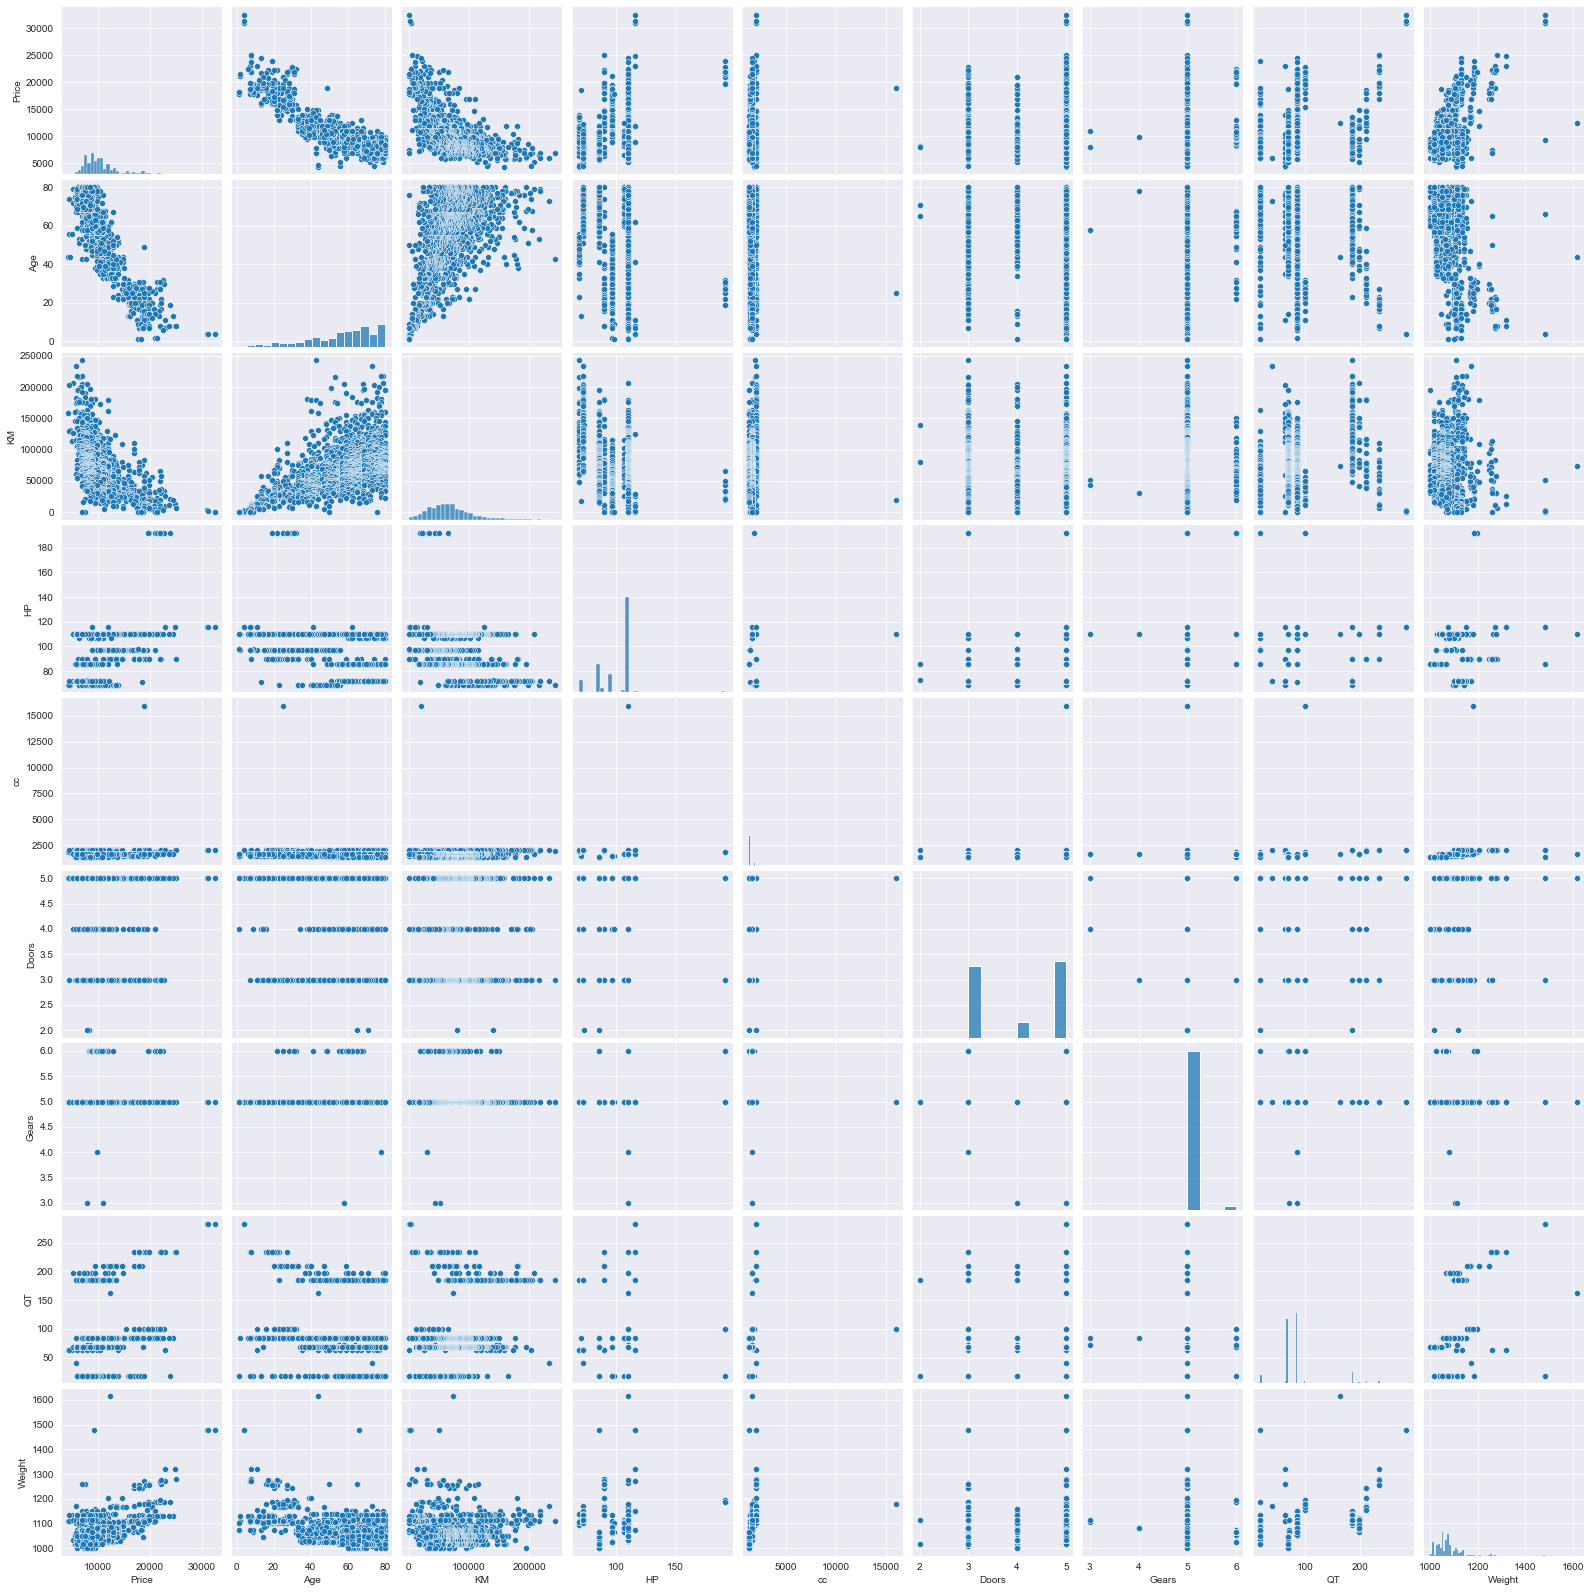

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo)

In [14]:
toyo.rename(columns={"cc":"CC"},inplace=True)

In [15]:
toyo_M = smf.ols("Price~Age+KM+HP+CC+Gears+QT+Doors+Weight",data=toyo).fit()

In [16]:
toyo_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:16:42   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [17]:
rsq_Age=smf.ols("Age~KM+HP+CC+Gears+QT+Weight",data=toyo).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_km=smf.ols("KM~Age+HP+CC+Gears+QT+Weight",data=toyo).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~Age+KM+CC+Gears+QT+Weight",data=toyo).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols("CC~Age+KM+HP+Gears+QT+Weight",data=toyo).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_g=smf.ols("Gears~Age+KM+HP+CC+QT+Weight",data=toyo).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_q=smf.ols("QT~Age+KM+HP+CC+Gears+Weight",data=toyo).fit().rsquared
vif_q=1/(1-rsq_q)

rsq_wt=smf.ols("Weight~Age+KM+HP+CC+Gears+QT",data=toyo).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_d=smf.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=toyo).fit().rsquared
vif_d=1/(1-rsq_d)

In [18]:
d1={"Variables":["Age","KM","HP","CC","Gears","QT","Weight","Doors"],
    "VIF":[vif_Age,vif_km,vif_hp,vif_cc,vif_g,vif_q,vif_wt,vif_d]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.876219
1,KM,1.755681
2,HP,1.412019
3,CC,1.163164
4,Gears,1.059159
5,QT,2.282609
6,Weight,2.330026
7,Doors,1.155890


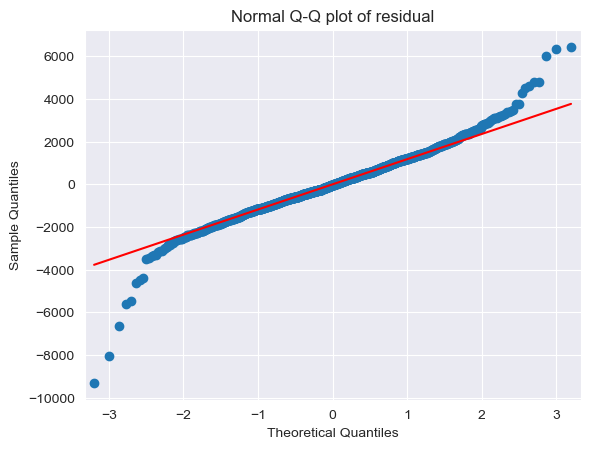

In [19]:
qqplot=sm.qqplot(toyo_M.resid,line='q')
plt.title("Normal Q-Q plot of residual")
plt.show()

In [20]:
list(np.where(toyo_M.resid<-6300))

[array([220, 600, 959], dtype=int64)]

In [21]:
list(np.where(toyo_M.resid>6300))

[array([146, 522], dtype=int64)]

In [22]:
def get_standardized_values(vals):
    return((vals-vals.mean())/vals.std())

<function matplotlib.pyplot.show(close=None, block=None)>

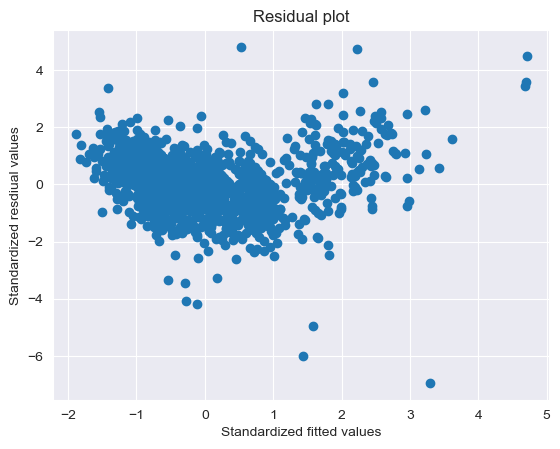

In [23]:
plt.scatter(get_standardized_values(toyo_M.fittedvalues),get_standardized_values(toyo_M.resid))
plt.title("Residual plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized resdiual values")
plt.show

### Residual vs regressors

eval_env: 1


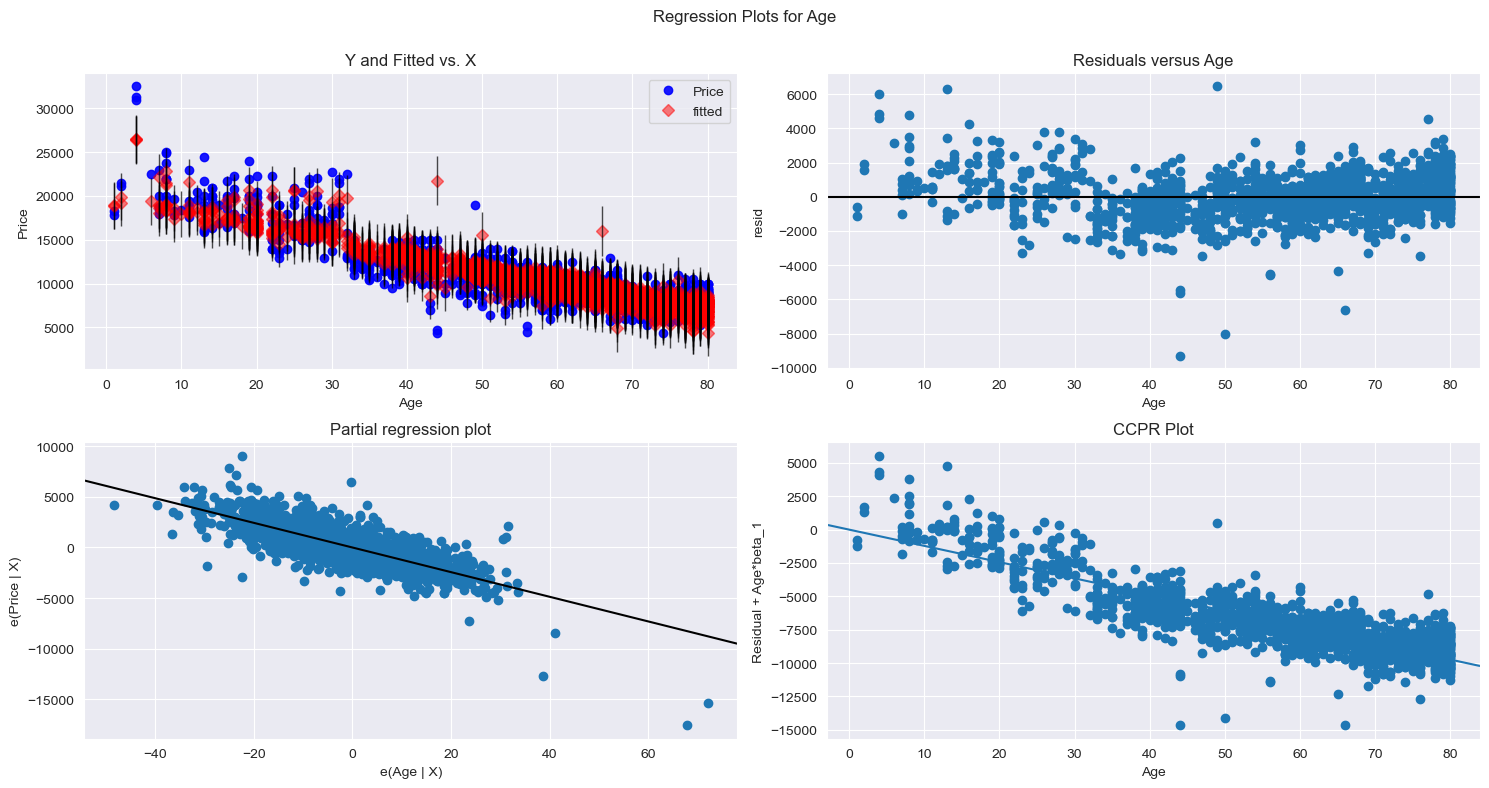

In [24]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"Age",fig=fig)
plt.show()

eval_env: 1


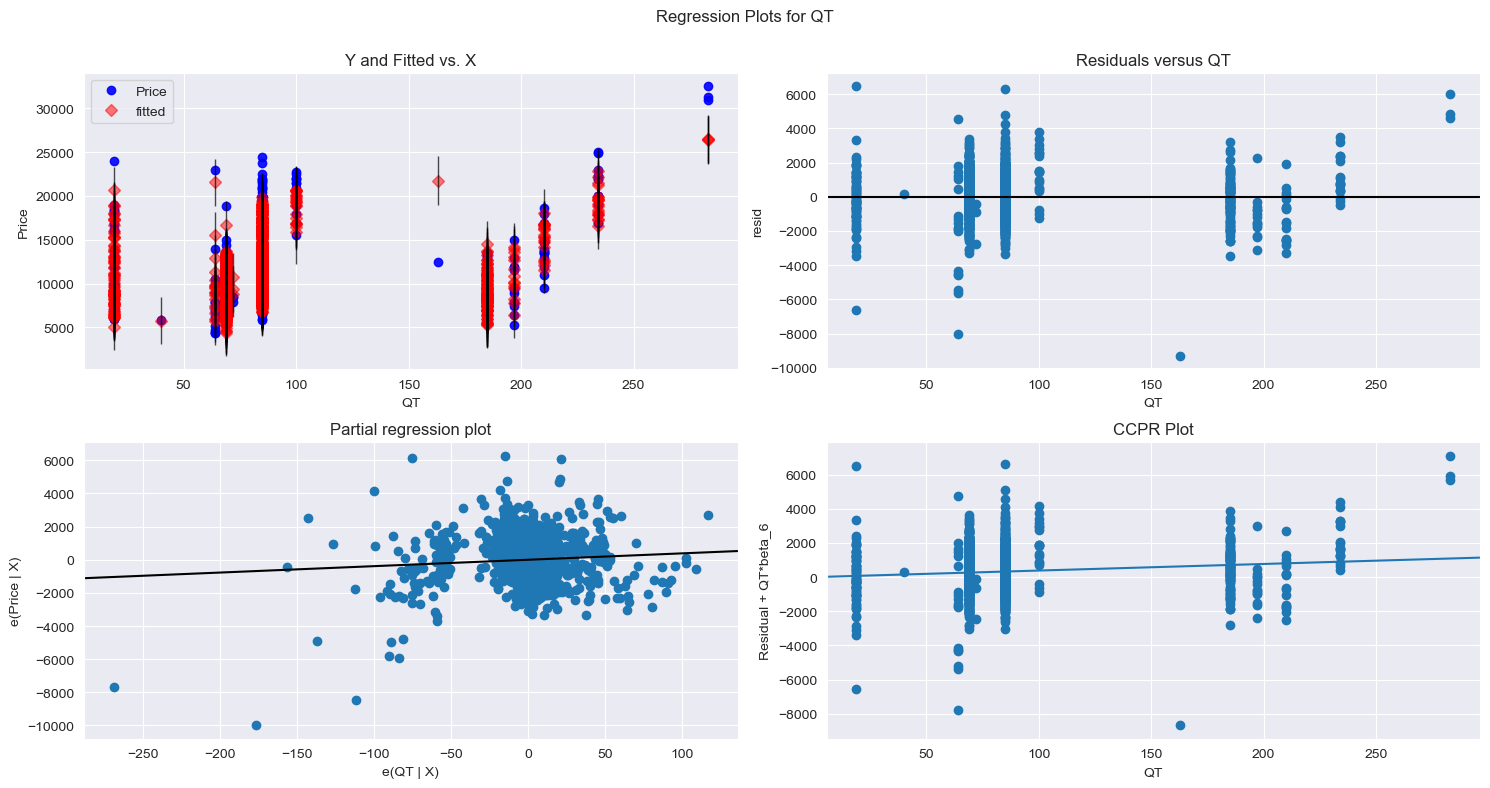

In [25]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"QT",fig=fig)
plt.show()

eval_env: 1


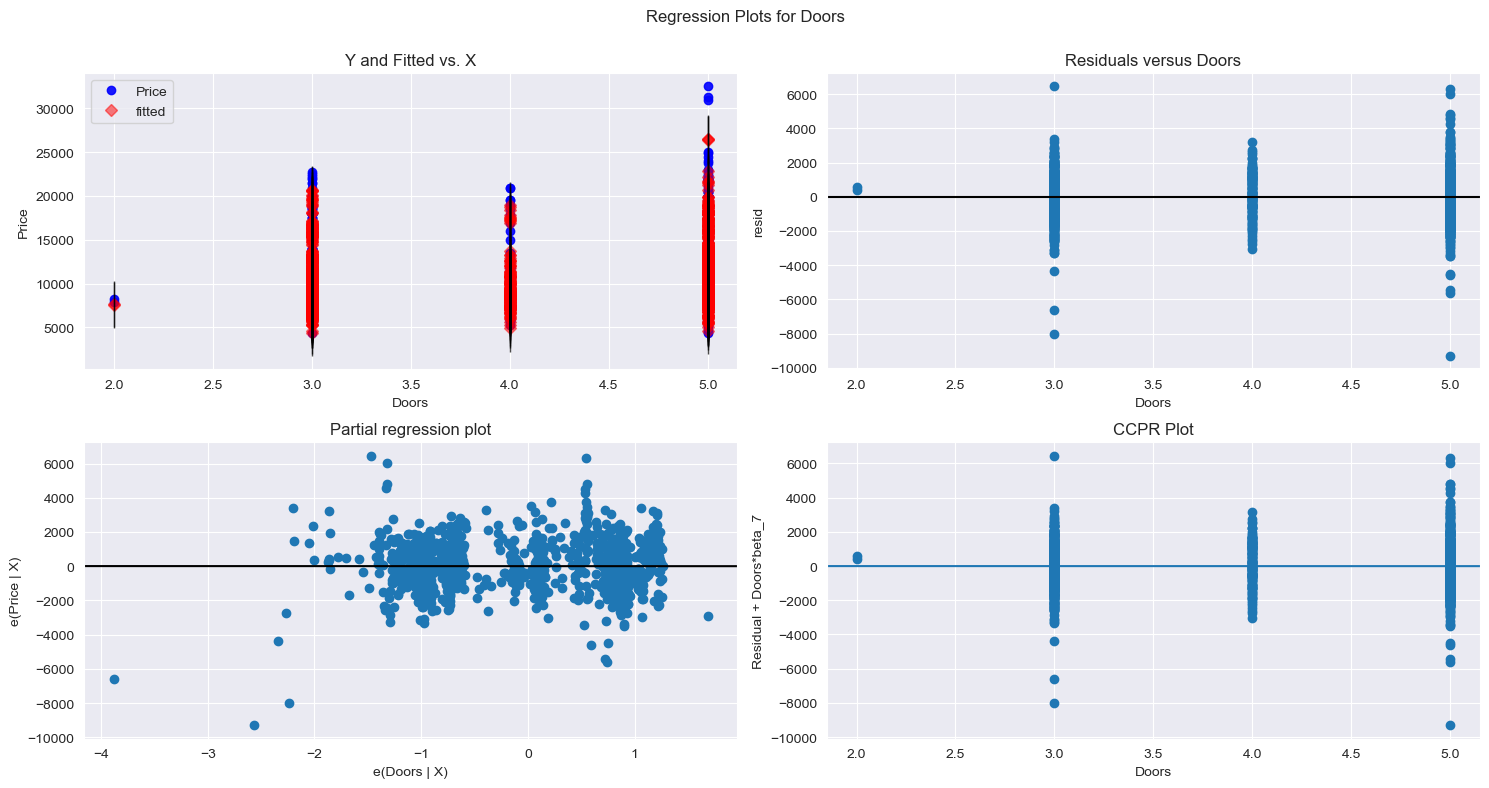

In [26]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"Doors",fig=fig)
plt.show()

eval_env: 1


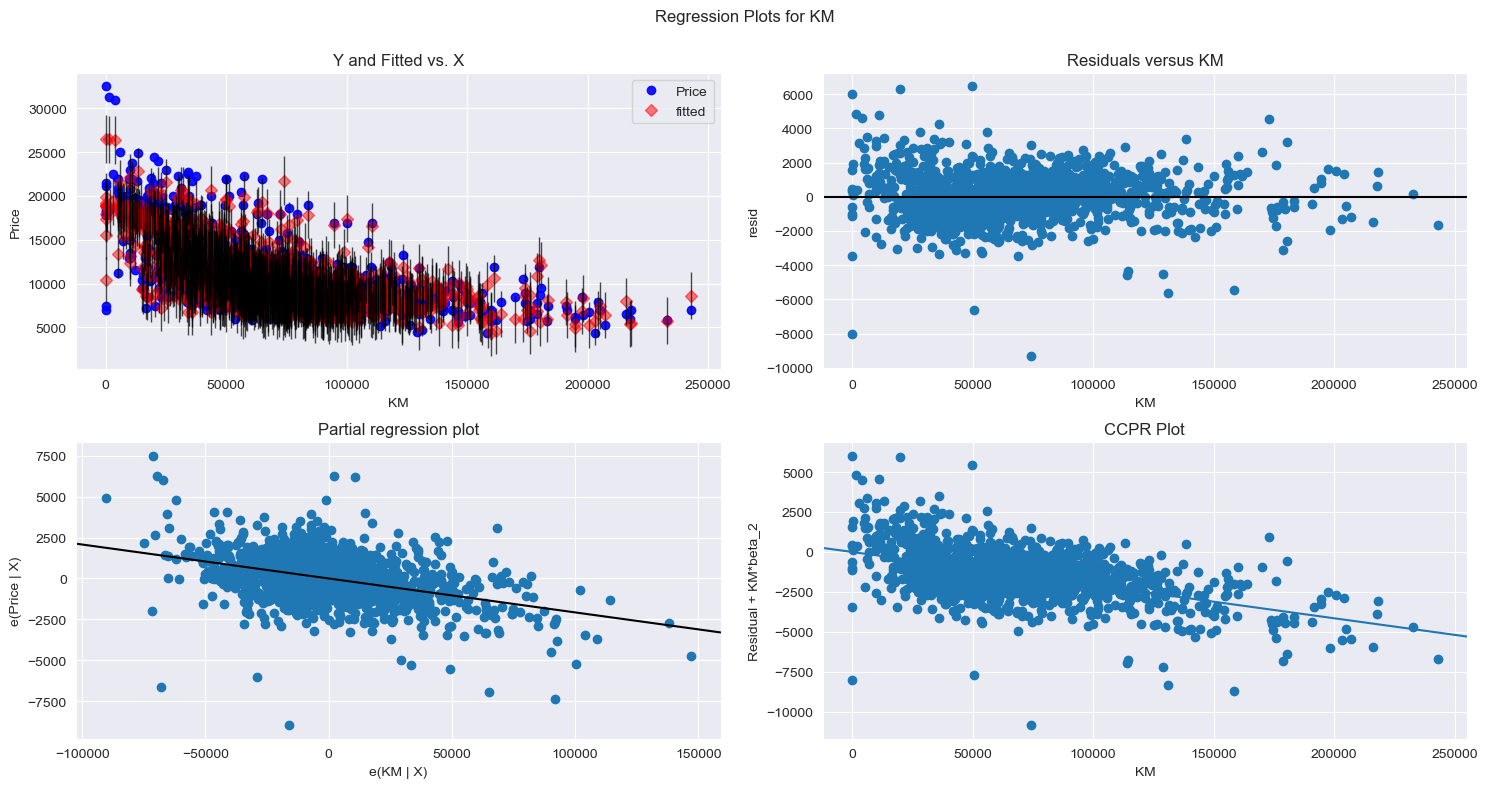

In [27]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"KM",fig=fig)
plt.show()

eval_env: 1


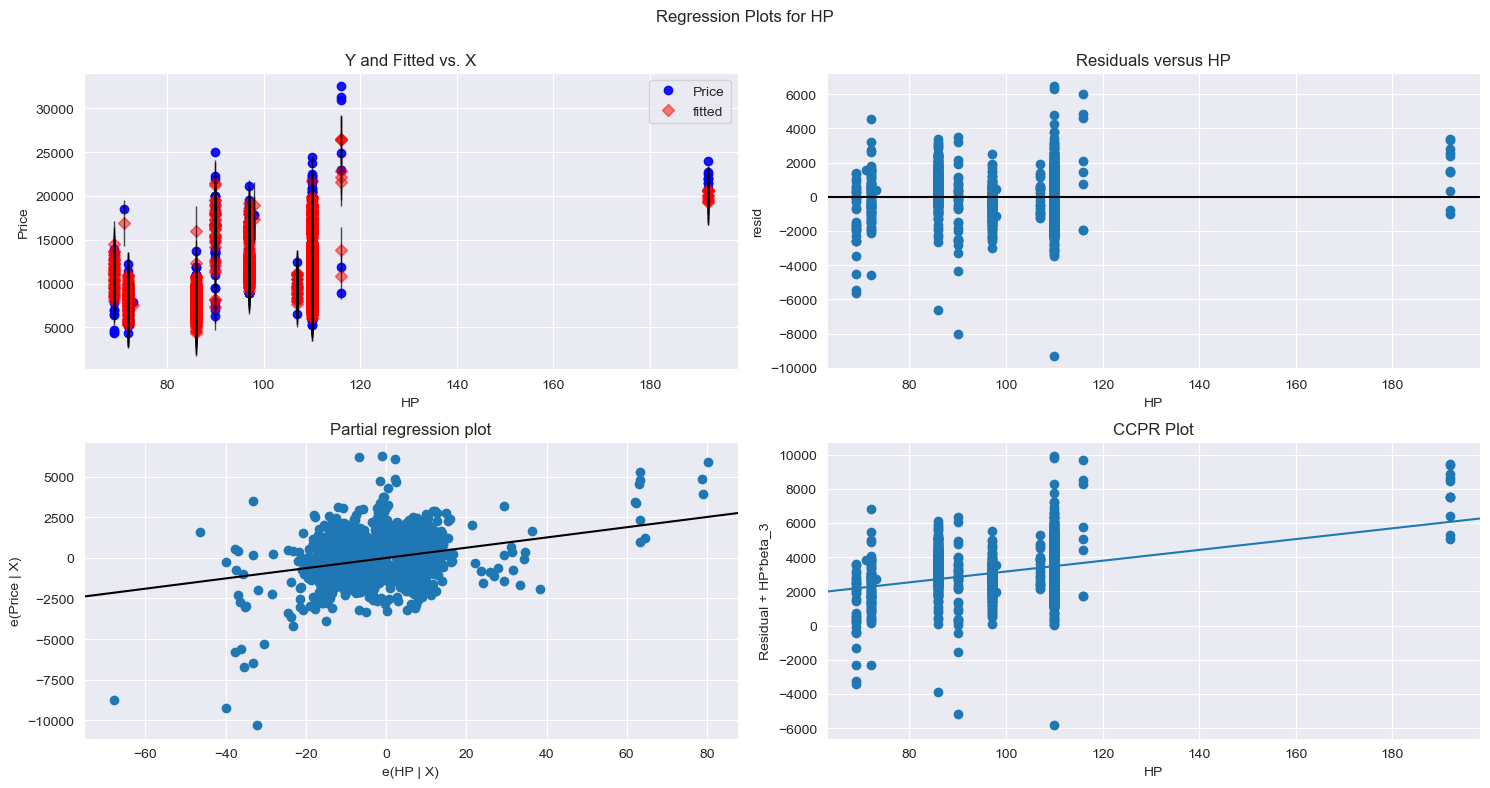

In [28]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"HP",fig=fig)
plt.show()

eval_env: 1


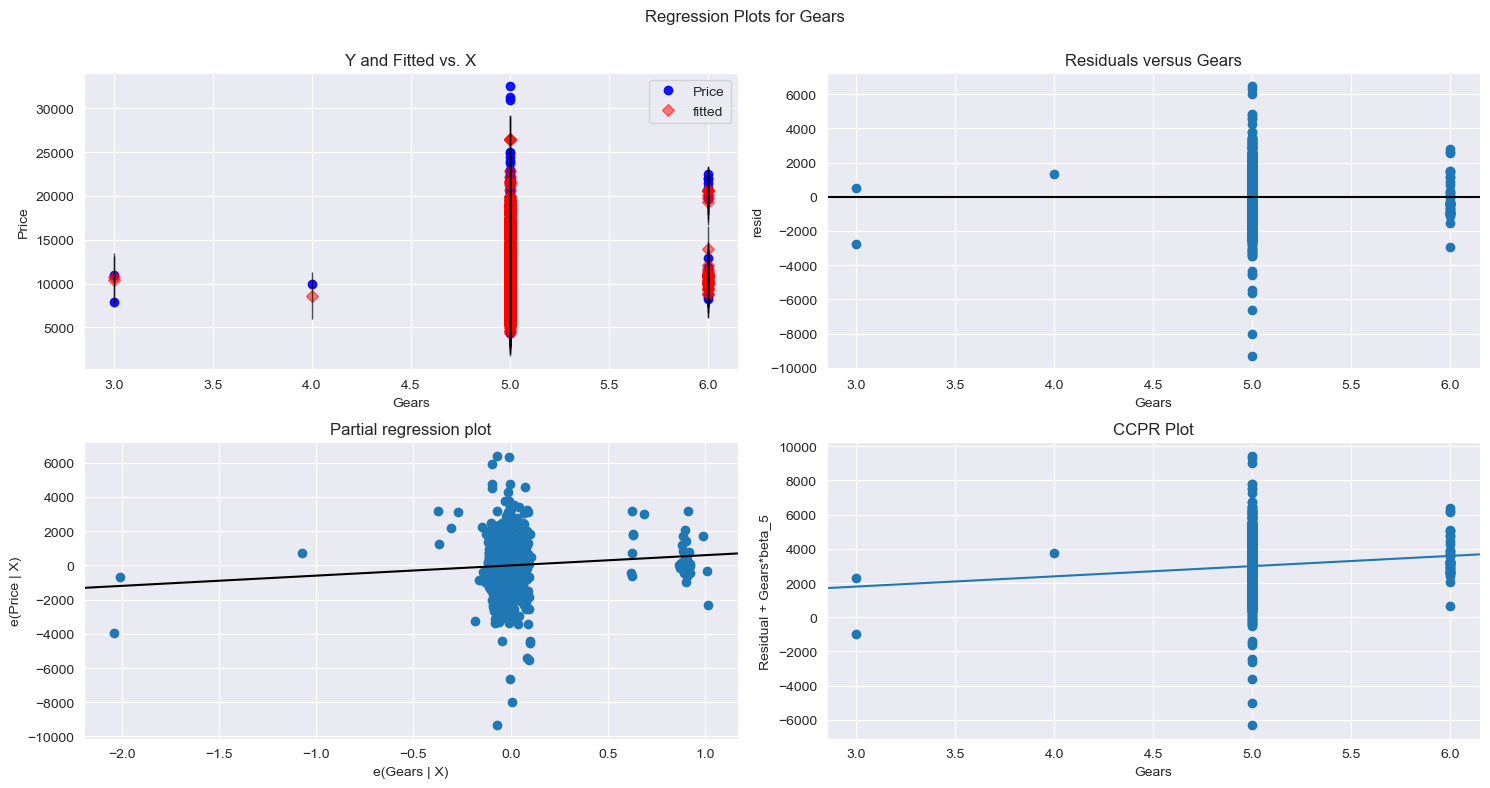

In [29]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"Gears",fig=fig)
plt.show()

eval_env: 1


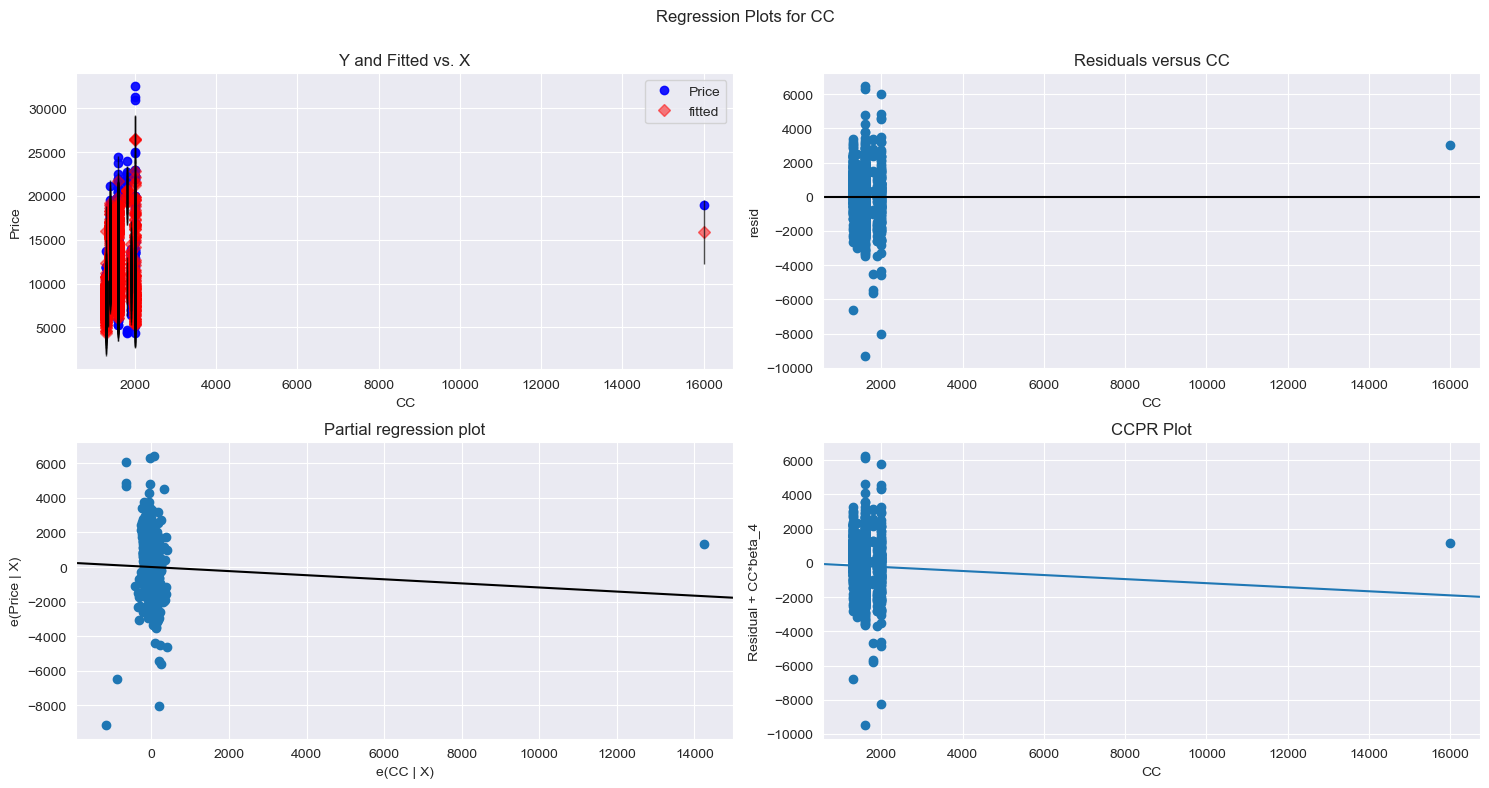

In [30]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"CC",fig=fig)
plt.show()

eval_env: 1


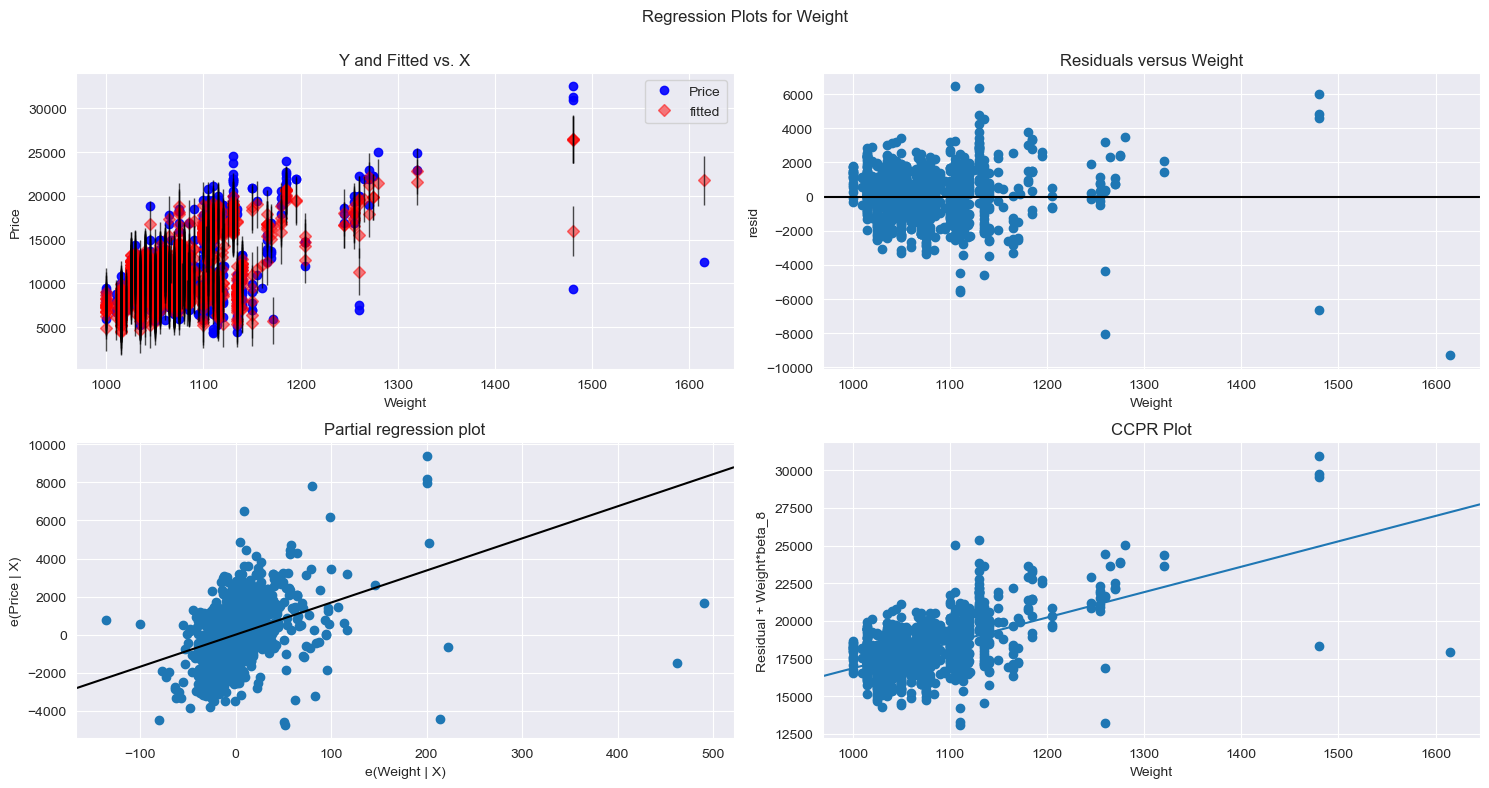

In [31]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(toyo_M,"Weight",fig=fig)
plt.show()

### Conclusion
#### -Doors has not contributes for predicting price 

### Cook's Distance

In [32]:
toyo_influence= toyo_M.get_influence()
(c,_)=toyo_influence.cooks_distance

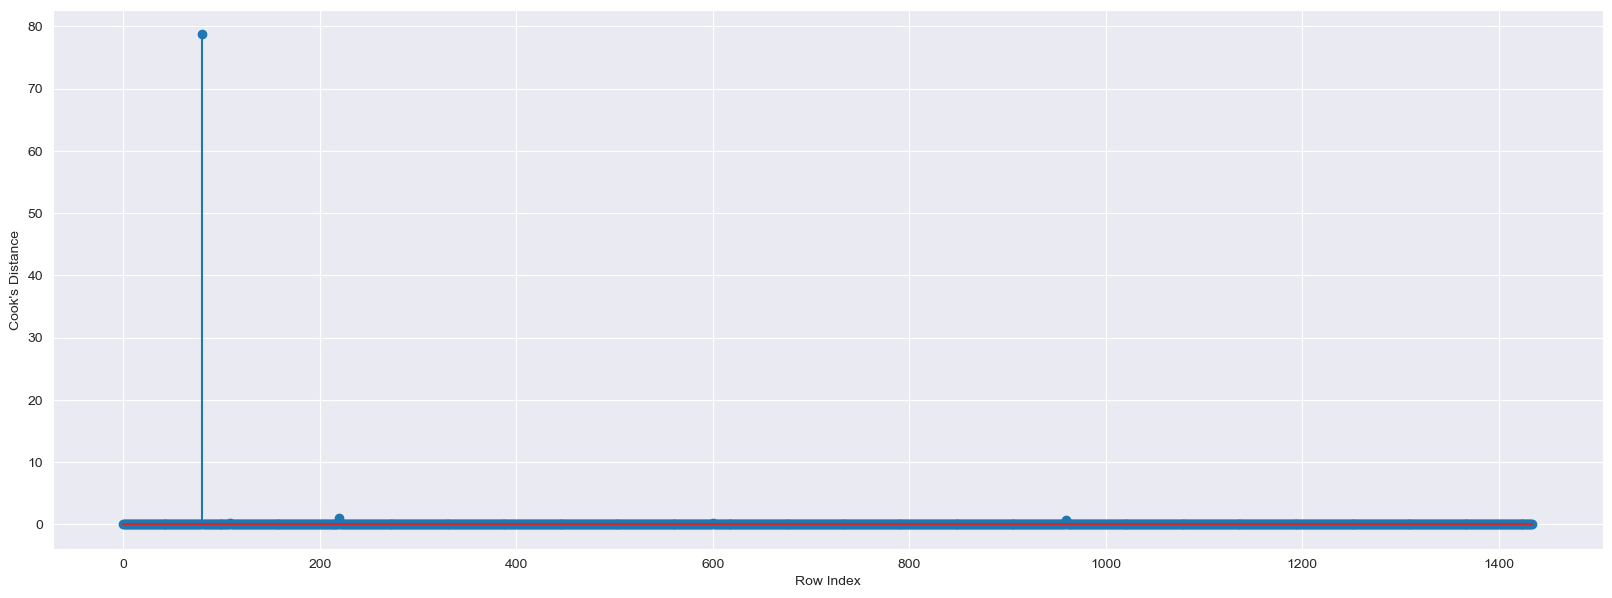

In [33]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show()

In [34]:
(np.argmax(c))

80

<function matplotlib.pyplot.show(close=None, block=None)>

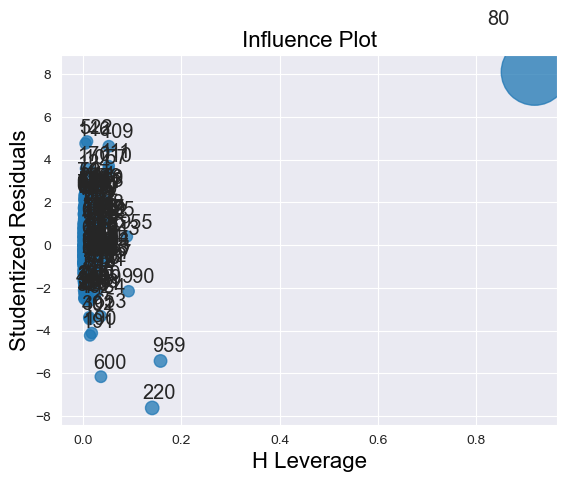

In [35]:
influence_plot(toyo_M)
plt.show

In [36]:
toyo.shape

(1435, 9)

In [37]:
k=toyo.shape[1]
n=toyo.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

#for np.max(c)>0.5:
    
    toyo2=toyo.drop(index=[np.argmax(c)],axis=0).reset_index()

   

In [38]:
while np.max(c)>0.5:
    toyo_m=smf.ols("Price~Age+KM+HP+CC+Gears+QT+Doors+Weight",data=toyo).fit()
    (c,_)=toyo_m.get_influence().cooks_distance
    #c
    #np.argmax(c),np.max(c)
    toyo=toyo.drop(index=[np.argmax(c)],axis=0).reset_index(drop=True)
    print("toyo_m accuracy is improved to",toyo_m.rsquared)
    
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo).fit()
    final_model.rsquared , final_model.aic
    print("Final_model accuracy is improved to ",final_model.rsquared)


toyo_m accuracy is improved to 0.8625200256947
toyo_m accuracy is improved to 0.8681163912634055
toyo_m accuracy is improved to 0.8765926307402282
toyo_m accuracy is improved to 0.8839684606741538
Final_model accuracy is improved to  0.8882395145171204


In [39]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:17:02   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
CC            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
QT             3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
toyo_final=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo).fit()

In [41]:
print("$","&",toyo_final.predict(toyo.iloc[:5]))

$ & 0    16345.352610
1    15886.635544
2    16328.224968
3    15996.318854
4    15883.424182
dtype: float64


In [42]:
toyo.iloc[:5]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
